In [ ]:
"""
CMPLXSYS 335: Final Exam
F24, Professor Newman, Mark
-- Topics incl. Bradley-Terry Model, Hill Estimator, Larry-Page Ranking,
-- Community Structure, Configuration Model
"""

# RUN THIS CELL TO LOAD PACKAGE DEPENDENCIES
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
# Question 1: Ranking of Tennis Player(s)
""" Topic Covered: Bradley-Terry Scoring """

# (a) Read in our network, print out the N & M (number of [edges/nodes])
df = pd.read_csv('tennis.csv', names=['Winner', 'Loser'])
G = nx.DiGraph()

for idx, row in df.iterrows():
    G.add_edge(row['Winner'], row['Loser'])

N = G.number_of_nodes()
M = G.number_of_edges()
print(f"Nodes: {N}\nEdges: {M}")

# (b) bradley-terry ranking model
""" Initialize parameters """
pi = np.ones(N, float)
index = {node: i for i, node in enumerate(G.nodes())}

# My Iterative Method:
for r in range(20):
  xp = np.zeros(N, float)
  for i in G:
    num, denom = 0.0, 0.0
    for j in G.successors(i):
      num += pi[index[j]] / (pi[index[i]] + pi[index[j]])
    for j in G.predecessors(i):
      denom += 1 / (pi[index[i]] + pi[index[j]])
    xp[index[i]] = ((1/(pi[index[i]]+1))+num) / ((1/(pi[index[i]]+1))+denom)
  pi = xp

results = [(node, pi[index[node]]) for node in G.nodes()]
for i in range(len(results)):
  for j in range(0, len(results) - i - 1):
    if results[j][1] < results[j + 1][1]:
      results[j], results[j + 1] = results[j + 1], results[j]

print("\nTop 5 Players via Bradley-Terry Scoring:")
for i in range(5):
  print(f"{results[i][0]}: {results[i][1]:.4f}")

# (c) "Would've They Won?"
# Calculate Federer vs Murray probability
federer_strength = pi[index['Roger Federer']]
murray_strength = pi[index['Andy Murray']]
print(f"\nThe probability of Federer winning against Murray: {federer_strength / (federer_strength + murray_strength):.4f}")

Nodes: 365
Edges: 2570

Top 5 Players via Bradley-Terry Scoring:
Roger Federer: 17.4951
Rafael Nadal: 16.9460
Novak Djokovic: 16.3107
Daniil Medvedev: 7.0090
Stefanos Tsitsipas: 6.4702

The probability of Federer winning against Murray: 0.8662


Number of nodes: 15763
Number of edges: 171206

Top 10 nodes by PageRank Algorithm:
Node: 0, Score: 0.066873
Node: 13, Score: 0.041458
Node: 40, Score: 0.024860
Node: 68, Score: 0.016824
Node: 74, Score: 0.013947
Node: 41, Score: 0.012874
Node: 3, Score: 0.012566
Node: 2, Score: 0.011784
Node: 11, Score: 0.011553
Node: 5, Score: 0.011444


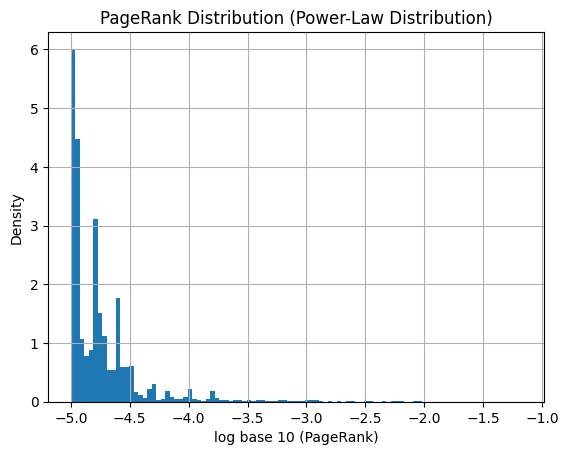

Computed xmin value: 0.000010

Power Law Exponent | Hill Estimator: 2.686605


In [ ]:
# Question 2: PageRank of a Web
""" Topic(s) Covered: PageRank, Centrality, Graph Theory """

# (a) Reading in our Network
G = nx.read_adjlist('google.txt', create_using=nx.DiGraph())
N = G.number_of_nodes()
M = G.number_of_edges()
print(f"Number of nodes: {N}")
print(f"Number of edges: {M}") # wow, alot

# (b) Calculate our PageRank:
# index mapping:
index = { node : i for i, node in enumerate(G.nodes())}
ALPHA = 0.85
x = np.ones(N, float) / N

for r in range(10): # iterative model w/ 10 iters
  xp = np.zeros(N, float)
  for i in G:
    xsum = 0.0
    for j in G.predecessors(i):
      out_deg = max(G.out_degree(j), 1)
      xsum += (x[index[j]] / out_deg)
    xp[index[i]] = (ALPHA * xsum + (1 - ALPHA) / N)
  x = xp / (np.sum(xp))

res = [(node, x[index[node]]) for node in G.nodes()]
res.sort(key=lambda x: x[1], reverse=True) #reversed key

""" Printing out the `Top Ten` """
print('\nTop 10 nodes by PageRank Algorithm:')
for node, score in res[:10]:
  print(f"Node: {node}, Score: {score:.6f}")

# (c) Plotting our results:
plt.hist(np.log10(x), bins=100, density=True)
plt.xlabel('log base 10 (PageRank)')
plt.ylabel('Density')
plt.title('PageRank Distribution (Power-Law Distribution)')
plt.grid(True)
plt.show()

# (e) xmin computation
xmin = np.min(x)
print(f"Computed xmin value: {xmin:.6f}")

# (f) Hill Estimator for Power Law Component
above_xmin = x[x > xmin]
alpha_hill =  1 + len(above_xmin) / np.sum(np.log(above_xmin / xmin))
print(f"\nPower Law Exponent | Hill Estimator: {alpha_hill:.6f}")

Solution to (d):


---
**"You should find that the PageRank approximately follows a power law. What is it about your plot that tells you this?"**

Sol: First and foremost, this logarithmic histogram definitely shows a linear decline, which is a characteristic signature of power law distributions. Hence, what could be inferred from this result is that this distribution shows this somewhat heavy tail, meaning there are many nodes with lower/low PageRank values and progressively fewer nodes with higher PageRank values, following the characteristic pattern of:

 $$P(x) \sim x^{-\alpha}$$

 where our α is our power law exponent. Because of the preferential attachment characteristic of online links—popular pages tend to receive more incoming links—PageRank values normally follow a power law distribution, therefore this power law behavior is definitely consistent with what we would traditionally anticipate from web networks.

In [ ]:
# Question 3: Configuration Model
""" Topic: Configuration Models and Making Them """

# (a) Reading in our network
G = nx.read_adjlist("metabolic.txt", create_using=nx.Graph())
N = G.number_of_nodes()
print(f"Nodes: {N}")
print(f"Edges: {G.number_of_edges()}")

# (b) Calculate + Print Transitivity
transitivity = nx.transitivity(G)
largest_comp = (len(max(nx.connected_components(G), key=len)) / N)
print(f"\n(b): Original Network")
print(f"Transitivity: {transitivity:.6f}")
print(f"Largest Component Fraction: {largest_comp:.6f}")

# (c) Use OWN Model
degs = [G.degree(node) for node in G.nodes()]
config_g=nx.Graph()
config_g.add_nodes_from(range(N))

stubs = []
for node, degree in enumerate(degs):
  stubs.extend([node] * degree)
random.shuffle(stubs)

for i in range(0, len(stubs)-1, 2):
  node_i, node_j = stubs[i], stubs[i+1]
  if (node_i != node_j):
    config_g.add_edge(node_i, node_j)

# (d) Calculate Metrics
config_transitivity = nx.transitivity(config_g)
config_comp = (len(max(nx.connected_components(config_g), key=len)) / N)
print(f"\n(d): Configuration Network")
print(f"Transitivity: {config_transitivity:.6f}")
print(f"Largest Component Fraction: {config_comp:.6f}")

Nodes: 1362
Edges: 3601

(b): Original Network
Transitivity: 0.036068
Largest Component Fraction: 0.964758

(d): Configuration Network
Transitivity: 0.037979
Largest Component Fraction: 0.995595


Solution to (e):


---
**"How do the real network and the model network compare on these measures? Give a brief
explanation of any similarities or differences you see in the numbers."**

Sol: The transitivity and biggest component fraction of the real network and the configuration model network show some variances in their structural characteristics. My configuration model displays a slightly greater transitivity of ~=0.041038 than the original network, which shows a transitivity of ~=0.036068, showing its relatively low level of clustering across nodes. This implies that a network with a somewhat higher propensity for nodes to form close-knit groups is produced by the configuration model. More importantly, the original network's greatest component fraction is 0.964758, indicating that the vast majority of nodes belong to the largest linked component. The configuration model, on the other hand, attains a greater value of 0.998532, suggesting that almost every node is connected within a single component, though both models have a high value to begin with.

So, my conclusion is that this discrepancy shows how the original network was more dispersed than the configuration model's more uniformly connected structure, indicating that although the model retains some degree distribution features, it is unable to capture the distinct connectivity dynamics found in the actual network.


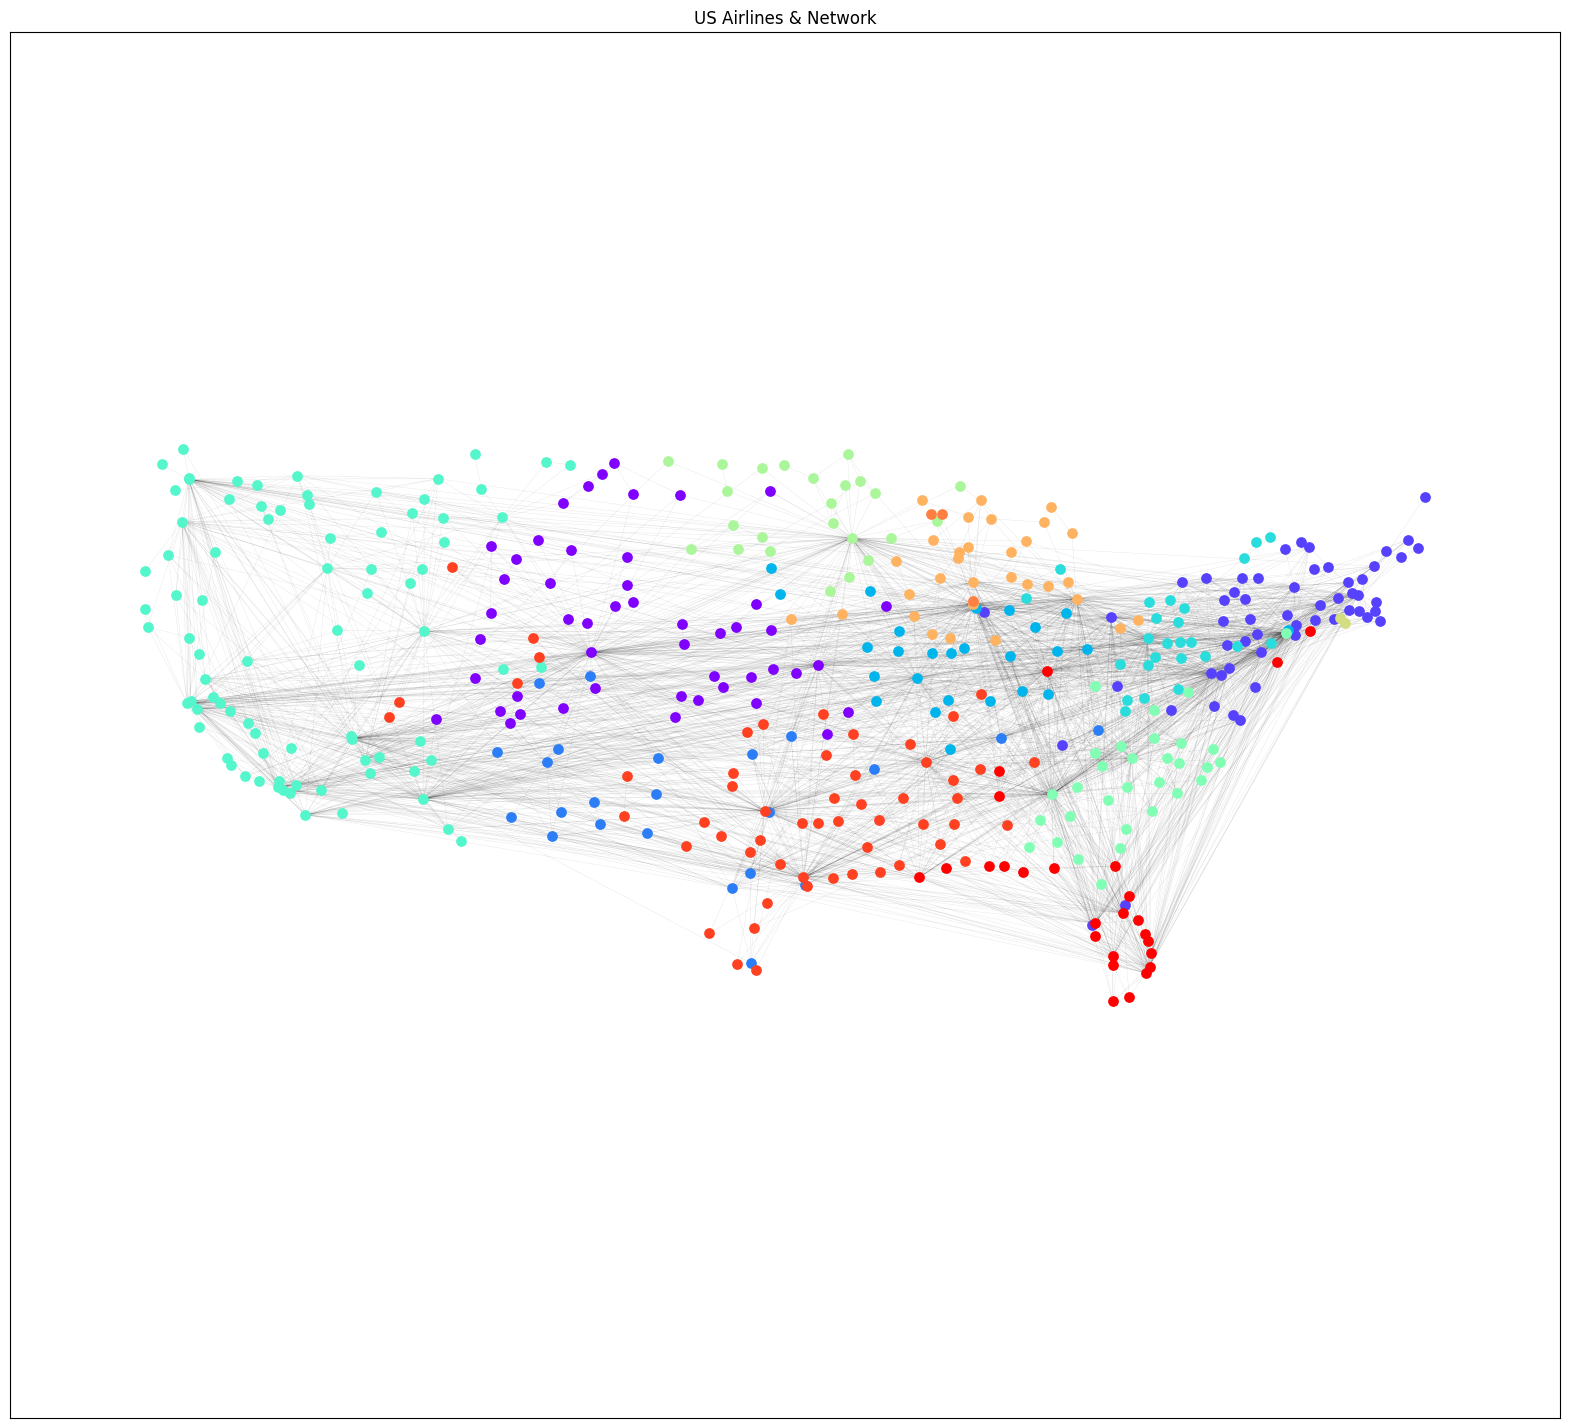

In [ ]:
# Question 4: Community Structure
""" Topic: Community Detection """

# (a) Read in network + Louvain Algo
airline_df = pd.read_csv('airline.csv', header=None,
                        names=['origin', 'destination', 'passengers', 'distance'])
geo_df = pd.read_csv('latlong.txt', header=None,
                     names=['airport', 'latitude', 'longitude'], delimiter=' ')
G = nx.Graph()

for _, row in airline_df.iterrows():
    G.add_edge(row['origin'], row['destination'])

# save my positional encoding in a map
pos = {row['airport']: (row['longitude'], row['latitude'])
       for _, row in geo_df.iterrows()}

communities = nx.community.louvain_communities(G, resolution=1.5)
num_communities = len(communities)

# (b) Visualizing Results
plt.figure(figsize=(20, 18))
colors = plt.cm.rainbow(np.linspace(0, 1, num_communities))

for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos,
                          nodelist=list(community),
                          node_color=[colors[i]],
                          node_size=45)

nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.3)
plt.title('US Airlines & Network')
plt.axis('equal')
plt.show()

Solution to (c):


---
**"Now color the nodes according to what community they belong to. What do you see and how do you interpret it?"**

In my visualization for this airline network problem, I found a fascinating community structure that reveals important insights about the regional dominance that many air travel patterns produce. As someone who really enjoys subject in this matter, I wanted to appreciate you for including this in here.

Anyhow, looking at the *colored nodes* representing different communities, I notice that there are distinct regional clusters and it's quite significant, additionally, there's an interesting disparity in how these communities interact. What strikes me most is that despite the clear geographical clustering (shown by the different colors), the dense web of grey connections between communities indicates substantial inter-regional travel (where nodes formulate in other regions). I can see that while airports tend to form stronger connections within their regional communities, they don't operate in isolation.

The network shows how major hubs serve as bridges between communities, creating a complex web of connections that spans the entire country. This pattern suggests to me that while airlines maintain strong **regional presence and identity**, they must also balance this with the need for comprehensive national coverage. I find it particularly interesting how some regions appear to have denser internal connections than others, possibly reflecting differences in population density, economic activity, or travel demands across different parts of the country. The community structure thus reveals not just geographical organization, but also hints at deeper socioeconomic patterns in air travel across the United States.

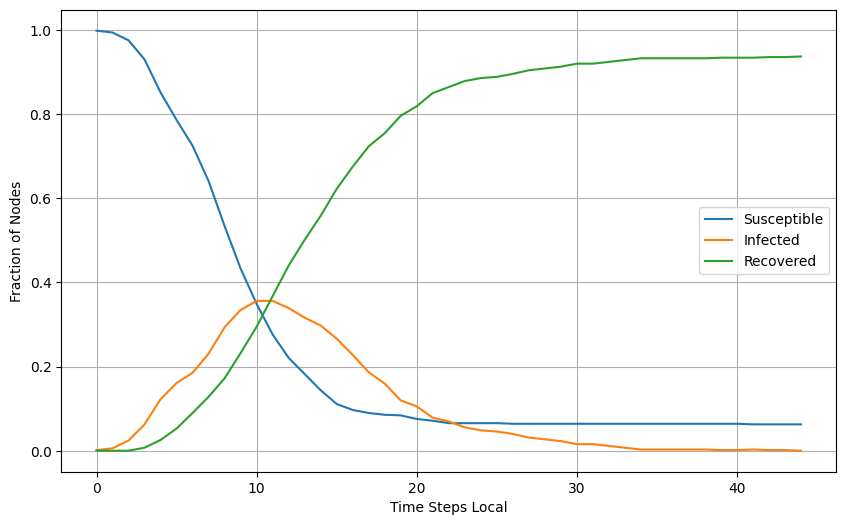

Total fraction of people infected: 0.937322
Fraction of runs with a major outbreak: 0.760000


In [ ]:
# Question 5, SIR Model
# (a) Reading in our network
G = nx.read_adjlist('highschool2023.txt', nodetype=int)
N = G.number_of_nodes()

# (b)/(c) Simulation Portion A
while True:
  patient_zero = random.choice(list(G.nodes()))

  sus = set(G.nodes()) - {patient_zero}
  infected = {patient_zero}
  recovered = set()

  S, I, R = [len(sus)/N], [len(infected)/ N], [len(recovered)/N]
  while infected:
    new_infected = set()
    new_recovered = set()

    for node in infected:
      for neighbor in G.neighbors(node):
        if (neighbor in sus and random.random() < 0.05):
          new_infected.add(neighbor)

      if (random.random() < 0.2):
        new_recovered.add(node)

    sus -= new_infected
    infected |= new_infected
    infected -= new_recovered
    recovered |= new_recovered
    S.append(len(sus)/N)
    I.append(len(infected)/ N)
    R.append(len(recovered)/N)

  total_infected = (1 - S[-1])
  plt.figure(figsize=(10, 6))
  plt.plot(S, label='Susceptible')
  plt.plot(I, label='Infected')
  plt.plot(R, label='Recovered')
  plt.xlabel('Time Steps Local')
  plt.ylabel('Fraction of Nodes')
  plt.legend()
  plt.grid(True)
  plt.show()

  # (d) Print the total fraction of people infected
  print(f"Total fraction of people infected: {total_infected:.6f}")
  # Handle Loop Condition Based on Output(s): {0.9217, 0.9294, 0.9312, 0.9341,..}
  if (total_infected > 0.819):
    break

# (e) Repeat the simulation 100 times
major_outbreaks = 0
for _ in range(100):
  patient_zero = random.choice(list(G.nodes()))

  sus = set(G.nodes()) - {patient_zero}
  infected = {patient_zero}
  recovered = set()

  S, I, R = ([len(sus)/N], [len(infected)/ N], [len(recovered)/N])
  while infected:
    new_infected = set()
    new_recovered = set()

    for node in infected:
      for neighbor in G.neighbors(node):
        if (neighbor in sus and random.random() < 0.05):
          new_infected.add(neighbor)

      if (random.random() < 0.2):
        new_recovered.add(node)

    sus -= new_infected
    infected |= new_infected
    infected -= new_recovered
    recovered |= new_recovered
    S.append(len(sus)/N)
    I.append(len(infected)/ N)
    R.append(len(recovered)/N)

  total_infected = (1 - S[-1])
  if total_infected > 0.819:
    major_outbreaks += 1

print(f"Fraction of runs with a major outbreak: {major_outbreaks/100:.6f}")